In [1]:
import tensorflow as tf

In [2]:
# load in the data
from sklearn.datasets import load_breast_cancer

In [3]:
# load the data
data = load_breast_cancer()

In [4]:
# check the type
type(data)

sklearn.utils._bunch.Bunch

In [5]:
# check the data
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
# check the shape
data.data, data.feature_names, data.data.shape

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst ra

In [7]:
# check the targets
data.target, data.target_names, data.target.shape

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [8]:
# split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [9]:
# Scale the data (beacuse it improves gradient descent learning)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# another way to create the model
# model = tf.keras.model.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 3s 49ms/step - loss: 0.2823 - accuracy: 0.9029 - val_loss: 0.2568 - val_accuracy: 0.9521
Epoch 2/100
12/12 [==============================] - 0s 12ms/step - loss: 0.2642 - accuracy: 0.9134 - val_loss: 0.2410 - val_accuracy: 0.9628
Epoch 3/100
12/12 [==============================] - 0s 17ms/step - loss: 0.2490 - accuracy: 0.9239 - val_loss: 0.2274 - val_accuracy: 0.9628
Epoch 4/100
12/12 [==============================] - 0s 21ms/step - loss: 0.2354 - accuracy: 0.9318 - val_loss: 0.2162 - val_accuracy: 0.9628
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 0.2236 - accuracy: 0.9318 - val_loss: 0.2060 - val_accuracy: 0.9628
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 0.2129 - accuracy: 0.9318 - val_loss: 0.1972 - val_accuracy: 0.9628
Epoch 7/100
12/12 [==============================] - 0s 17ms/step - loss: 0.2035 - accuracy: 0.9344 - val_loss: 0.1890 - val_accuracy: 0.9681
Epoch 8/

In [11]:
# Evaluate the model - evaluate() returns loss and accuracy
print("Train Score:", model.evaluate(X_train, y_train))
print("Test Score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 4ms/step - loss: 0.0677 - accuracy: 0.9921
Train Score: [0.06767798960208893, 0.9921259880065918]
6/6 [==============================] - 0s 3ms/step - loss: 0.0843 - accuracy: 0.9734
Test Score: [0.08430032432079315, 0.9734042286872864]


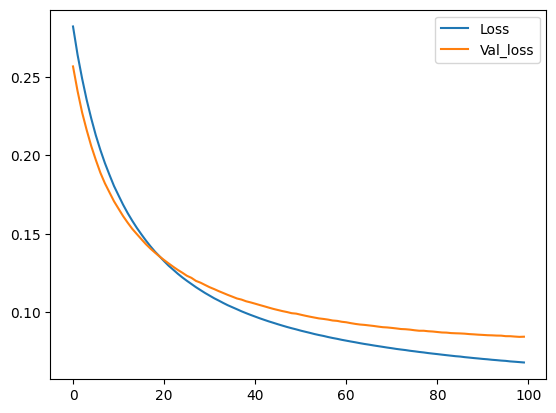

In [12]:
# Plot what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_loss')
plt.legend()
plt.show()

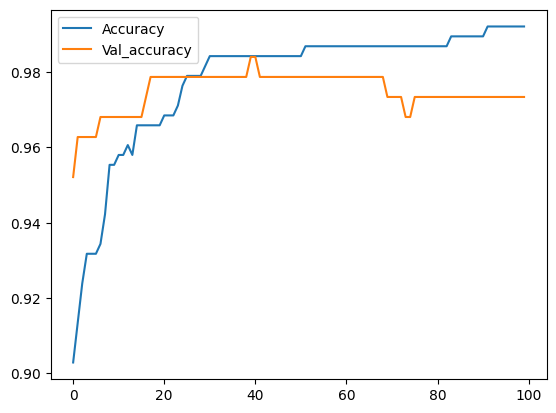

In [13]:
# Plot accuracy too
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_accuracy')
plt.legend()
plt.show()

In [ ]:
# Make predictions
p = model.predict(X_test)

In [15]:
import numpy as np
p = np.round(p).flatten()

In [17]:
np.mean(p == y_test)

0.973404255319149